In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_parquet('data/train_v2.parquet')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              750000 non-null  int32  
 1   Age             750000 non-null  float32
 2   Height          750000 non-null  float32
 3   Weight          750000 non-null  float32
 4   Duration        750000 non-null  float32
 5   Heart_Rate      750000 non-null  float32
 6   Body_Temp       750000 non-null  float32
 7   Calories        750000 non-null  float64
 8   Sex_Encoded     750000 non-null  float32
 9   BMI             750000 non-null  float32
 10  Total_Exertion  750000 non-null  float32
 11  Heart_Effort    750000 non-null  float32
 12  BMR             750000 non-null  float32
 13  LBM             750000 non-null  float32
 14  BSA             750000 non-null  float32
 15  Body_Fat_Pct    750000 non-null  float32
 16  MHR             750000 non-null  float32
 17  pct_MHR   

In [3]:
# Adjust rcParams for custom background colors
plt.rcParams['figure.facecolor'] = '#fffff8'  # White for figure background
plt.rcParams['axes.facecolor'] = '#fffff8'    # White for axes background
plt.rcParams['axes.edgecolor'] = 'black'      # Black border around axes
plt.rcParams['grid.color'] = '#d3d3d3'        # Light gray grid lines
plt.rcParams['grid.alpha'] = 0.8

plt.rcParams['lines.linewidth'] = 0.3
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.3
# Set global font size and weight
plt.rcParams['font.family'] = 'Comic Sans MS'  # Set font family to Comic Sans MS
plt.rcParams['font.size'] = 14  # Set font size to 11
# plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold

# Apply to axes titles, labels, and ticks
plt.rcParams['axes.titlesize'] = 16
# plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Apply to figure titles
plt.rcParams['figure.titlesize'] = 16

pd.set_option('display.max_columns', 50)  # Show all columns in DataFrame

In [ ]:
train_df.drop(columns=["kfold"], inplace=True)

In [7]:
y_log = np.log1p(train_df["Calories"])

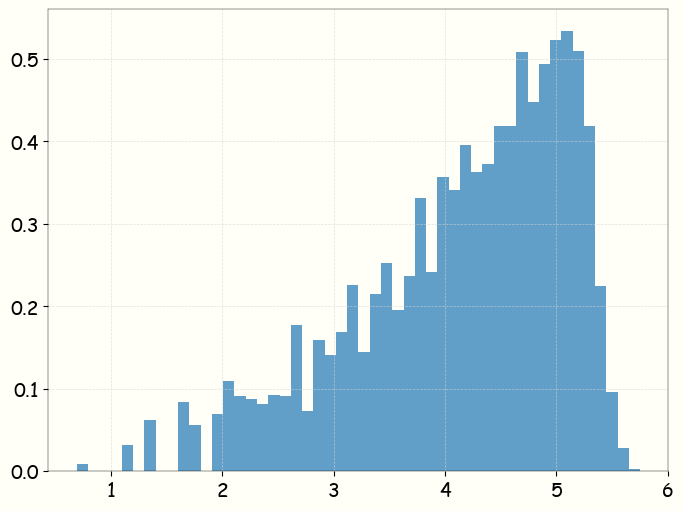

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100)
ax.hist(y_log, bins=50, alpha=0.7, density=True)
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

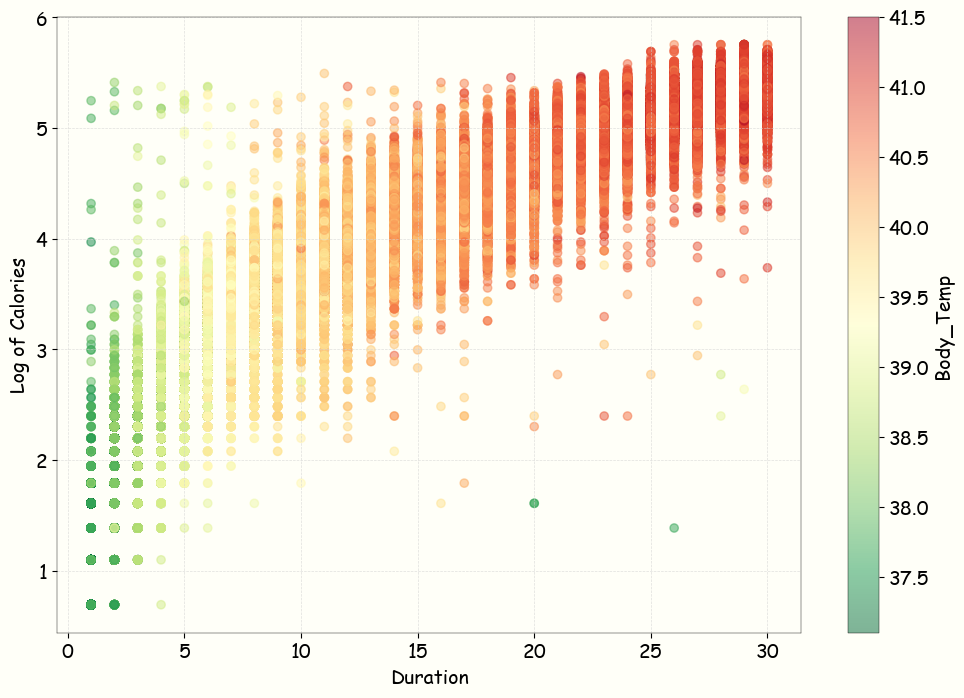

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100)
scatter = ax.scatter(
    train_df["Duration"], 
    y_log, 
    c=train_df["Body_Temp"],
    cmap='RdYlGn_r',
    alpha=0.5,
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Body_Temp')
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlabel("Duration")
ax.set_ylabel("Log of Calories")
plt.show()

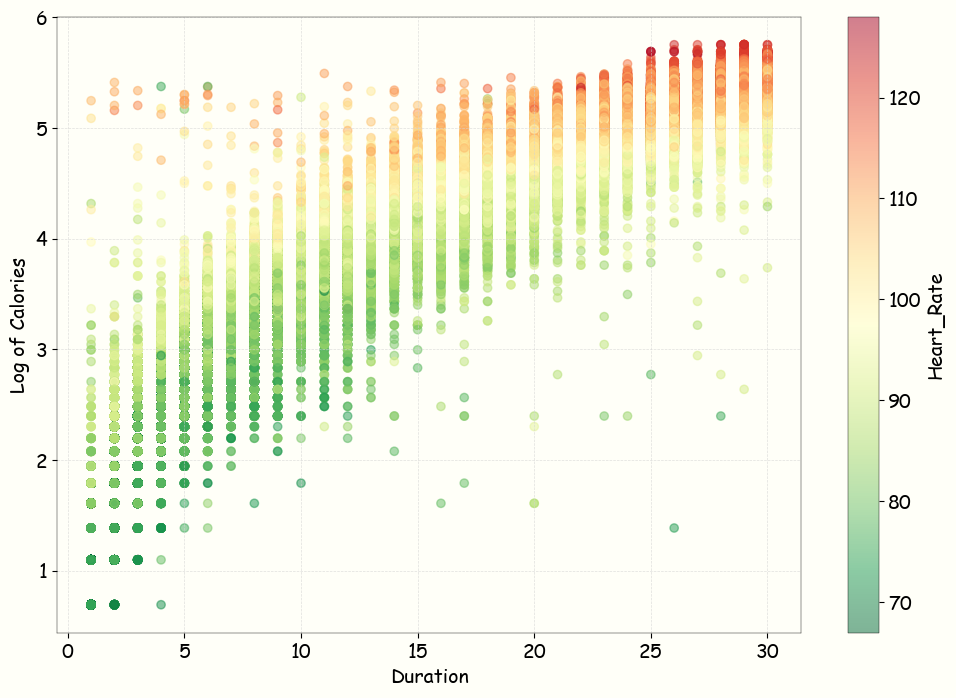

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100)
scatter = ax.scatter(
    train_df["Duration"], 
    y_log, 
    c=train_df["Heart_Rate"],
    cmap='RdYlGn_r',
    alpha=0.5,
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Heart_Rate')
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlabel("Duration")
ax.set_ylabel("Log of Calories")
plt.show()

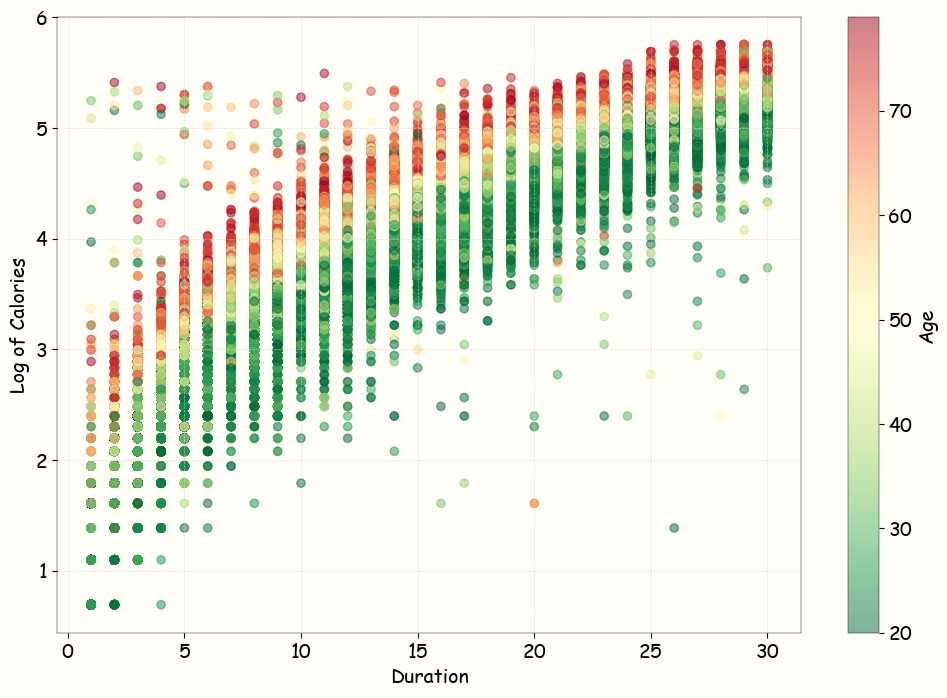

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100)
scatter = ax.scatter(
    train_df["Duration"], 
    y_log, 
    c=train_df["Age"],
    cmap='RdYlGn_r',
    alpha=0.5,
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Age')
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlabel("Duration")
ax.set_ylabel("Log of Calories")
plt.show()

## Detect outliers

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              750000 non-null  int32  
 1   Age             750000 non-null  float32
 2   Height          750000 non-null  float32
 3   Weight          750000 non-null  float32
 4   Duration        750000 non-null  float32
 5   Heart_Rate      750000 non-null  float32
 6   Body_Temp       750000 non-null  float32
 7   Calories        750000 non-null  float64
 8   Sex_Encoded     750000 non-null  float32
 9   BMI             750000 non-null  float32
 10  Total_Exertion  750000 non-null  float32
 11  Heart_Effort    750000 non-null  float32
 12  BMR             750000 non-null  float32
 13  LBM             750000 non-null  float32
 14  BSA             750000 non-null  float32
 15  Body_Fat_Pct    750000 non-null  float32
 16  MHR             750000 non-null  float32
 17  pct_MHR   

In [13]:
from sklearn.neighbors import LocalOutlierFactor

detector = LocalOutlierFactor(
    n_neighbors=50,
    algorithm="auto",
    contamination="auto",
    n_jobs=-1
)

outlier_labels = detector.fit_predict(train_df.drop(columns=["id"]))
print("Number of outliers detected:", np.sum(outlier_labels == -1))

Number of outliers detected: 2679


In [16]:
outlier_factor = detector.negative_outlier_factor_

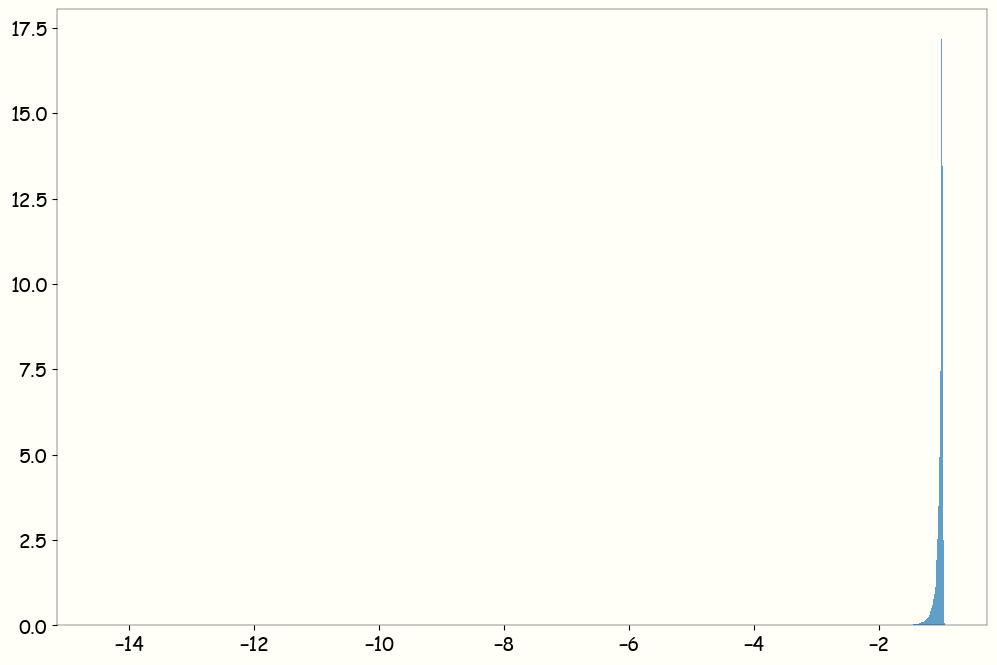

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100)
ax.hist(outlier_factor, bins=1000, alpha=0.7, density=True)
plt.show()

In [87]:
train_df["bin"] = pd.qcut(outlier_factor, q=100, labels=False)
train_df["bin"].describe()

count    750000.000000
mean         49.499999
std          28.866089
min           0.000000
25%          24.750000
50%          49.500000
75%          74.250000
max          99.000000
Name: bin, dtype: float64

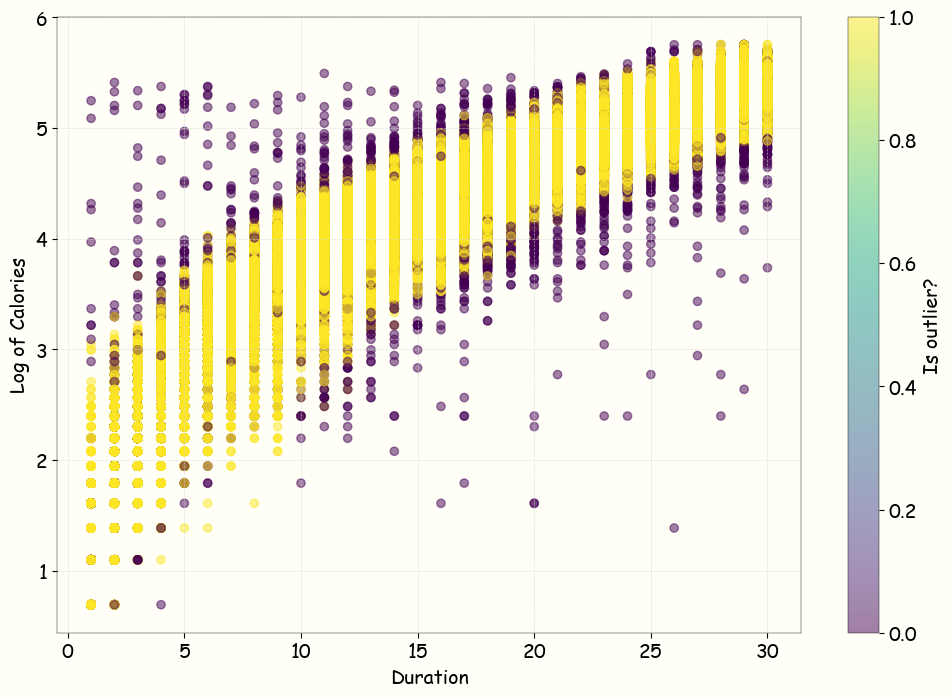

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100)
scatter = ax.scatter(
    train_df["Duration"], 
    y_log, 
    c=train_df["bin"] > 0,
    alpha=0.5,
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Is outlier?')
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlabel("Duration")
ax.set_ylabel("Log of Calories")
plt.show()

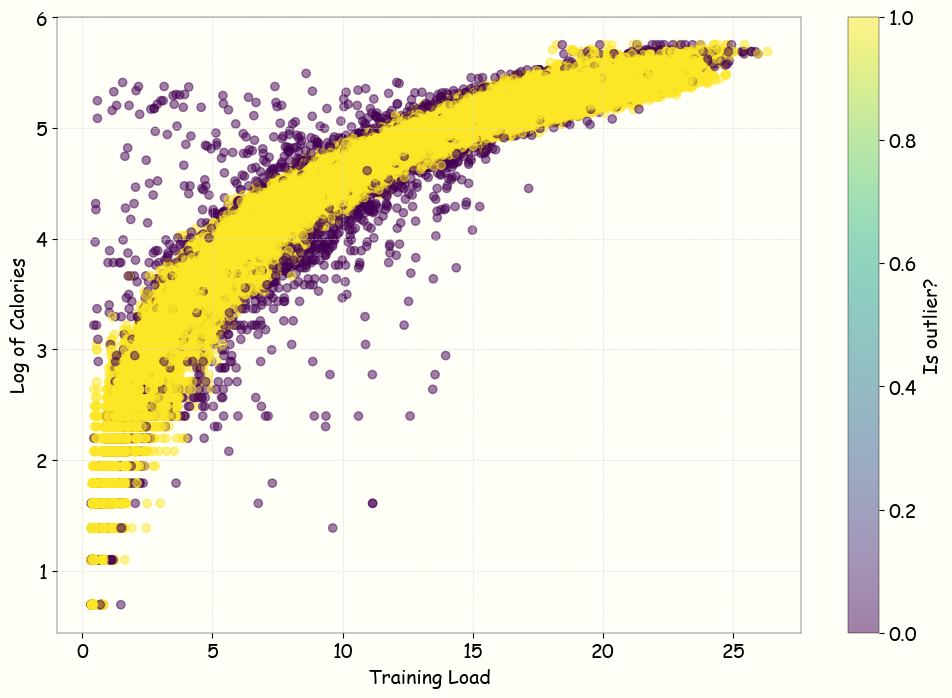

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=100)
scatter = ax.scatter(
    train_df["Training_Load"],
    y_log, 
    c=train_df["bin"] > 0,
    alpha=0.5,
)
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Is outlier?')
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_xlabel("Training Load")
ax.set_ylabel("Log of Calories")
plt.show()

In [90]:
from sklearn.model_selection import KFold, StratifiedKFold

train_df["kfold"] = -1
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_df["bin"] = (train_df["bin"] > 0).astype(int)  # Convert to binary for stratification
for fold, (_, val_idx) in enumerate(skf.split(train_df, train_df["bin"])):
    train_df.loc[val_idx, "kfold"] = fold

In [91]:
train_df.drop(columns=["bin"], inplace=True)

In [92]:
train_df["kfold"] = train_df["kfold"].astype("int32")

In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              750000 non-null  int32  
 1   Age             750000 non-null  float32
 2   Height          750000 non-null  float32
 3   Weight          750000 non-null  float32
 4   Duration        750000 non-null  float32
 5   Heart_Rate      750000 non-null  float32
 6   Body_Temp       750000 non-null  float32
 7   Calories        750000 non-null  float64
 8   Sex_Encoded     750000 non-null  float32
 9   BMI             750000 non-null  float32
 10  Total_Exertion  750000 non-null  float32
 11  Heart_Effort    750000 non-null  float32
 12  BMR             750000 non-null  float32
 13  LBM             750000 non-null  float32
 14  BSA             750000 non-null  float32
 15  Body_Fat_Pct    750000 non-null  float32
 16  MHR             750000 non-null  float32
 17  pct_MHR   

In [94]:
train_df.to_parquet('data/train_v3.parquet', index=False)